<a href="https://colab.research.google.com/github/RafaelTorresDias/Trabalho_Python2/blob/master/Trabalho02_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> IMPORTANTE! </font>
O meu código foi feito do Jupyter e rodou perfeitamente, o nome do arquivo txt é ("dados_farmacos.txt") e o mesmo foi carregado sem problemas.
Qualquer dúvida sobre rodar o código me pergunte por e_mail: rafaeltorresdias@yahoo.com.br

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Questão 01
Utilizando os dados experimentais, faça um gráfico relacionando o tempo transcorrido e a concentração de fármaco no sangue de cada paciente.

In [0]:
def itens_grafico(titulo,eixo_x,eixo_y):
  plt.title(titulo)
  plt.xlabel(eixo_x)
  plt.ylabel(eixo_y)
  plt.grid()

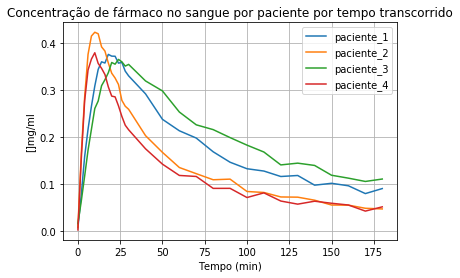

In [7]:
peso = np.array([82,73,85,68])
sexo = [0,1,1,0] #Considerei Feminino como zero e masculino como 1
leitura_dados = np.transpose(np.loadtxt("dados_farmacos.txt"))
tempo = np.array(leitura_dados[0])
paciente_1 = np.array(leitura_dados[1])
paciente_2 = np.array(leitura_dados[2])
paciente_3 = np.array(leitura_dados[3])
paciente_4 = np.array(leitura_dados[4])
plt.plot(tempo,paciente_1,tempo,paciente_2,tempo,paciente_3,tempo,paciente_4)
plt.legend(["paciente_1","paciente_2","paciente_3","paciente_4"])
itens_grafico("Concentração de fármaco no sangue por paciente por tempo transcorrido","Tempo (min)","[]mg/ml");

# Questão 02
Construa uma figura contendo 3 gráficos de barras da seguinte forma:

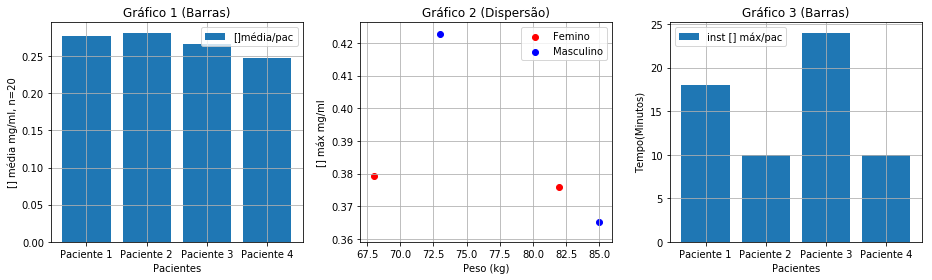

In [8]:
plt.figure(figsize=(13,4))

#Gráfico 1: Gráfico de barras contendo a concentração média das 20 primeiras amostras coletadas de cada paciente.
x=np.arange(0,4)
media_amostras = [np.mean(paciente_1[:20]),np.mean(paciente_2[:20]),np.mean(paciente_3[:20]),np.mean(paciente_4[:20])]

plt.subplot(1,3,1)
plt.bar(x,media_amostras)
plt.xticks(x, ['Paciente 1','Paciente 2', 'Paciente 3', 'Paciente 4']);
itens_grafico("Gráfico 1 (Barras)","Pacientes","[] média mg/ml, n=20");
plt.legend(["[]média/pac"])
plt.tight_layout()


#Gráfico 2: Gráfico de dispersão relacionando o peso de cada paciente à sua máxima concentração atingida. Use cores diferentes para diferenciar o sexo do paciente.
peso_maximo = np.array ([np.max(paciente_1),np.max(paciente_2),np.max(paciente_3),np.max(paciente_4)])
plt.subplot(1,3,2)

for i in range(len(peso)): #se o sexo for Feminino que é igual a 0 cor vermelha, se masculino igual a 1 cor azul
    if sexo[i]==0:
        s = "red"
    else:
        s ="blue"
    plt.scatter(peso[i],peso_maximo[i],color=s)   

itens_grafico("Gráfico 2 (Dispersão)","Peso (kg)","[] máx mg/ml");
plt.legend(["Femino","Masculino"])
plt.tight_layout()


#Gráfico 3: Gráfico de barras contendo o instante no qual a máxima concentração de cada paciente ocorre.
instante= []
x=np.arange(0,4)

instante.append(tempo[paciente_1.tolist().index(peso_maximo[0])])
instante.append(tempo[paciente_2.tolist().index(peso_maximo[1])])
instante.append(tempo[paciente_3.tolist().index(peso_maximo[2])])
instante.append(tempo[paciente_4.tolist().index(peso_maximo[3])])

plt.subplot(1,3,3)
plt.bar(x,instante)
plt.xticks(x, ['Paciente 1','Paciente 2', 'Paciente 3', 'Paciente 4'])
itens_grafico("Gráfico 3 (Barras)","Pacientes","Tempo(Minutos)")
plt.legend(["inst [] máx/pac"])
plt.savefig("Figura_Trab02.png");

# Questão 03
Faça um gráfico de concentração versus tempo contendo os dados experimentais do paciente 3 e o resultado estimado por cada modelo. Com base na análise visual, qual modelo melhor representa os dados?

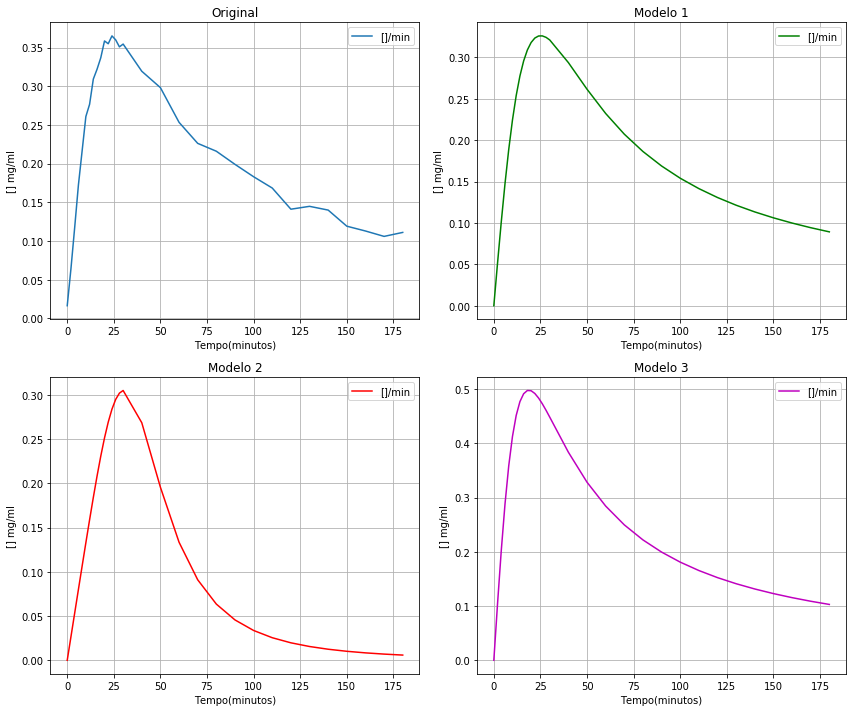

In [9]:
modelo_1 = (0.065*tempo) / (((0.063*tempo)**2)+2.5)
modelo_2 = (0.028*tempo) / (((0.03*tempo)**4)+2.1)
modelo_3 = (tempo) / (9*(((0.077*tempo)**2) + 2.1))

plt.figure(figsize=(12,10))
#Original
plt.subplot(2,2,1)
plt.plot(tempo,paciente_3)
itens_grafico("Original","Tempo(minutos)","[] mg/ml");
plt.legend(["[]/min"])
plt.tight_layout()

#Modelo 01
plt.subplot(2,2,2)
plt.plot(tempo,modelo_1,"g")
itens_grafico("Modelo 1","Tempo(minutos)","[] mg/ml");
plt.legend(["[]/min"])
plt.tight_layout()

#Modelo 02
plt.subplot(2,2,3)
plt.plot(tempo,modelo_2,"r")
itens_grafico("Modelo 2","Tempo(minutos)","[] mg/ml");
plt.legend(["[]/min"])
plt.tight_layout()

#Modelo 03
plt.subplot(2,2,4)
plt.plot(tempo,modelo_3,"m")
itens_grafico("Modelo 3","Tempo(minutos)","[] mg/ml");
plt.legend(["[]/min"])
plt.tight_layout()

###  <font color=red> Resposta questão 03: </font>:
Acho que o primeiro modelo tendo em vista a forma e aproximação de valores

# Questão 4
Calcule o RMSE para os modelos apresentado no item anterior considerando os dados do Paciente 3 e indique qual o melhor modelo para representar esses dados.

In [10]:
def rmse(paciente, modelo):
    return np.sqrt(((paciente - modelo) ** 2).mean())

rmse_val = rmse(np.array(paciente_3), np.array(modelo_1))
print("Modelo 1 o erro de rmse é: " + str(rmse_val))
rmse_val = rmse(np.array(paciente_3), np.array(modelo_2))
print("Modelo 2 o erro de rmse é: " + str(rmse_val))
rmse_val = rmse(np.array(paciente_3), np.array(modelo_3))
print("Modelo 3 o erro de rmse é: " + str(rmse_val))

Modelo 1 o erro de rmse é: 0.026694384512307455
Modelo 2 o erro de rmse é: 0.10754841288052355
Modelo 3 o erro de rmse é: 0.09350552476502559


### <font color=red> Resposta questão 04: </font>:
O melhor modelo para representar os dados é o modelo 01